# Install library

In [ ]:
pip install pythainlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 50.8 MB/s eta 0:00:00


In [ ]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234911 sha256=ad8ccc11817f685fe7bdd4d2352d35bf5dae01515c13d69250baffc300c70f28
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji


In [ ]:
import pandas as pd
import numpy as np
import re
import emoji

# Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read data from csv file
df1 = pd.read_csv('/content/drive/MyDrive/wsdata_train_cn.csv', delimiter=',')
df2 = pd.read_csv('/content/drive/MyDrive/wsdata_val_cn.csv', delimiter=',')
df3 = pd.read_csv('/content/drive/MyDrive/wsdata_test_cn.csv', delimiter=',')

In [ ]:
'''df1 = df1.iloc[0:2500,[2,4]]
df2 = df2.iloc[0:2500,[2,5]]
df3 = df3.iloc[0:2500,[2,5]]
df4 = df4.iloc[0:2500,[2,5]]
df5 = df5.iloc[0:2500,[2,5]]'''

## Concat All Dataframe

In [ ]:
# concatenating all df along rows
df = pd.concat([df1, df2, df3], axis=0)

In [ ]:
df

,label,text
0,1,จองแล้วนาจา Mitsubishi Attrage สงกรานต์ รอขับน...
1,1,ศักราช! นายกฯ แถลงข่าวการแข่งขันศึก #ช้างเอฟเอ...
2,1,บัตรสมาชิกลดไหมคับ
3,1,สนใจ new mazda2
4,0,", Juke : รถวะ ประหลาด CHR : สวย ล้ำ คุ้ม"
...,...,...
2657,0,ลงมา ดีเท่าเดิม แวะมาหาเซเว่นน๊า #ubeer ฮิพอ...
2658,1,แพนด้าซิ่ง มุมมองแตกต่างลงตัวสไตล์ Mu-X Face Off
2659,0,ดอม
2660,1,เจมส์ บอนด์ ขับโตโยต้าอัลติส 555555555555


## Reset index

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df

,label,text
0,1,จองแล้วนาจา Mitsubishi Attrage สงกรานต์ รอขับน...
1,1,ศักราช! นายกฯ แถลงข่าวการแข่งขันศึก #ช้างเอฟเอ...
2,1,บัตรสมาชิกลดไหมคับ
3,1,สนใจ new mazda2
4,0,", Juke : รถวะ ประหลาด CHR : สวย ล้ำ คุ้ม"
...,...,...
26608,0,ลงมา ดีเท่าเดิม แวะมาหาเซเว่นน๊า #ubeer ฮิพอ...
26609,1,แพนด้าซิ่ง มุมมองแตกต่างลงตัวสไตล์ Mu-X Face Off
26610,0,ดอม
26611,1,เจมส์ บอนด์ ขับโตโยต้าอัลติส 555555555555


In [ ]:
# check class distribution
df['label'].value_counts(normalize = True)

1    0.566490
2    0.255627
0    0.177883
Name: label, dtype: float64

## Save to CSV

In [ ]:
from google.colab import files
df.to_csv("wsdata_all.csv",encoding="utf_8_sig", index=False)
files.download("wsdata_all.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Preprocessing Data

In [13]:
# import csv file
df = pd.read_csv('/content/reungrao_all.csv', delimiter=',')

In [15]:
df.iloc[11945:11955,:]

,text,label
11945,ท้าชกกันเลย:grinning_face_with_sweat:,1.0
11946,ตำรวจเก่งและดี,0.0
11947,เค้าโกรธแย้วว :cat_with_tears_of_joy::cat_with...,2.0
11948,"""ลุง8ปี"" ทำไรเหมือน ""เด็กน้อย""....",1.0
11949,เข้าทางก็รับสารภาพ สิ,1.0
11950,จะคืนเงินเดือนทำไมครับ,1.0
11951,ท่าใส่จุนแจมือ:flushed_face::flushed_face::bea...,1.0
11952,นี่ซิวะลูกผู้ชายตัวจริงตัวต่อตัวกันไปเลยว่ะไม่...,1.0
11953,เกลียดมากชายไทยแบบนี้,2.0
11954,:beaming_face_with_smiling_eyes::face_with_tea...,1.0


## Word Normalization

In [ ]:
from pythainlp.util import normalize

In [ ]:
df.loc[:, 'text'] = df.loc[:, 'text'].astype(str)

In [ ]:
df.loc[:,'text_normalize'] = df.loc[:,'text'].map(normalize)

In [ ]:
df

,text,label,text_normalize
0,:face-blue-smiling:,1.0,:face-blue-smiling:
1,1,1.0,1
2,:folded_hands:,1.0,:folded_hands:
3,สวัสดีค่ะ,1.0,สวัสดีค่ะ
4,อรุณสวัสดิ์ มาดูข่าวกันครับ,1.0,อรุณสวัสดิ์ มาดูข่าวกันครับ
...,...,...,...
12495,จุดแข็งคือหัว จุดอ่อนคือสิ่งที่อยู่ในนั้น,1.0,จุดแข็งคือหัว จุดอ่อนคือสิ่งที่อยู่ในนั้น
12496,จัดไป,1.0,จัดไป
12497,ถ้าเราเจอไฟไหม้ เราต้องโทรไปเเจ้งใคร ที่เบอร์อ...,1.0,ถ้าเราเจอไฟไหม้ เราต้องโทรไปแจ้งใคร ที่เบอร์อะ...
12498,แม่งเก่ง,0.0,แม่งเก่ง


## Remove Emoji

In [ ]:
def remove_emoji_mac(comment) :
    # convert emojis to text representations
    #comment = emoji.demojize(comment)
    # remove text representations of emojis
    comment = re.sub(r':[a-zA-Z_\-0-9]+:', '', comment)
    # remove any remaining punctuation
    #comment = re.sub(r'[^\w\s]', '', comment)
    return comment

In [ ]:
df.loc[:,'text_rm_emoji'] = df.loc[:,'text_normalize'].map(remove_emoji_mac)

In [ ]:
df.head()

,text,label,text_normalize,text_rm_emoji
0,:face-blue-smiling:,1.0,:face-blue-smiling:,
1,1,1.0,1,1
2,:folded_hands:,1.0,:folded_hands:,
3,สวัสดีค่ะ,1.0,สวัสดีค่ะ,สวัสดีค่ะ
4,อรุณสวัสดิ์ มาดูข่าวกันครับ,1.0,อรุณสวัสดิ์ มาดูข่าวกันครับ,อรุณสวัสดิ์ มาดูข่าวกันครับ


In [ ]:
df.loc[17,:]

text              :hugging_face: สวัสดี เรื่องเล่าเช้านี้ :cherr...
label                                                           1.0
text_normalize    :hugging_face: สวัสดี เรื่องเล่าเช้านี้ :cherr...
text_rm_emoji                             สวัสดี เรื่องเล่าเช้านี้ 
Name: 17, dtype: object

## Replace only white space cell to NA from text_rm_emoji column

In [ ]:
df['text_rm_emoji'] = df['text_rm_emoji'].apply(lambda x: x.strip()).replace('', pd.NA)

In [ ]:
df

,text,label,text_normalize,text_rm_emoji
0,:face-blue-smiling:,1.0,:face-blue-smiling:,<NA>
1,1,1.0,1,1
2,:folded_hands:,1.0,:folded_hands:,<NA>
3,สวัสดีค่ะ,1.0,สวัสดีค่ะ,สวัสดีค่ะ
4,อรุณสวัสดิ์ มาดูข่าวกันครับ,1.0,อรุณสวัสดิ์ มาดูข่าวกันครับ,อรุณสวัสดิ์ มาดูข่าวกันครับ
...,...,...,...,...
12495,จุดแข็งคือหัว จุดอ่อนคือสิ่งที่อยู่ในนั้น,1.0,จุดแข็งคือหัว จุดอ่อนคือสิ่งที่อยู่ในนั้น,จุดแข็งคือหัว จุดอ่อนคือสิ่งที่อยู่ในนั้น
12496,จัดไป,1.0,จัดไป,จัดไป
12497,ถ้าเราเจอไฟไหม้ เราต้องโทรไปเเจ้งใคร ที่เบอร์อ...,1.0,ถ้าเราเจอไฟไหม้ เราต้องโทรไปแจ้งใคร ที่เบอร์อะ...,ถ้าเราเจอไฟไหม้ เราต้องโทรไปแจ้งใคร ที่เบอร์อะ...
12498,แม่งเก่ง,0.0,แม่งเก่ง,แม่งเก่ง


## Drop text_rm_emoji that NULL

In [ ]:
df = df.dropna(subset=['text_rm_emoji'])

## Reset Index

In [ ]:
df.reset_index(inplace = True, drop = True)

In [ ]:
df

,text,label,text_normalize,text_rm_emoji
0,1,1.0,1,1
1,สวัสดีค่ะ,1.0,สวัสดีค่ะ,สวัสดีค่ะ
2,อรุณสวัสดิ์ มาดูข่าวกันครับ,1.0,อรุณสวัสดิ์ มาดูข่าวกันครับ,อรุณสวัสดิ์ มาดูข่าวกันครับ
3,D jai,1.0,D jai,D jai
4,สวัสดีชาวโลก,1.0,สวัสดีชาวโลก,สวัสดีชาวโลก
...,...,...,...,...
11954,จุดแข็งคือหัว จุดอ่อนคือสิ่งที่อยู่ในนั้น,1.0,จุดแข็งคือหัว จุดอ่อนคือสิ่งที่อยู่ในนั้น,จุดแข็งคือหัว จุดอ่อนคือสิ่งที่อยู่ในนั้น
11955,จัดไป,1.0,จัดไป,จัดไป
11956,ถ้าเราเจอไฟไหม้ เราต้องโทรไปเเจ้งใคร ที่เบอร์อ...,1.0,ถ้าเราเจอไฟไหม้ เราต้องโทรไปแจ้งใคร ที่เบอร์อะ...,ถ้าเราเจอไฟไหม้ เราต้องโทรไปแจ้งใคร ที่เบอร์อะ...
11957,แม่งเก่ง,0.0,แม่งเก่ง,แม่งเก่ง


## Tokenize

In [ ]:
from pythainlp.tokenize import word_tokenize

In [ ]:
df.loc[:, 'text_tokenize'] = df.loc[:,'text_rm_emoji'].map(word_tokenize)
df.head()

<ipython-input-19-9b4523872be4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'text_tokenize'] = df.loc[:,'text_rm_emoji'].map(word_tokenize)


,text,label,text_normalize,text_rm_emoji,text_tokenize
0,1,1.0,1,1,[1]
1,สวัสดีค่ะ,1.0,สวัสดีค่ะ,สวัสดีค่ะ,"[สวัสดี, ค่ะ]"
2,อรุณสวัสดิ์ มาดูข่าวกันครับ,1.0,อรุณสวัสดิ์ มาดูข่าวกันครับ,อรุณสวัสดิ์ มาดูข่าวกันครับ,"[อรุณสวัสดิ์, , มา, ดู, ข่าว, กัน, ครับ]"
3,D jai,1.0,D jai,D jai,"[D, , jai]"
4,สวัสดีชาวโลก,1.0,สวัสดีชาวโลก,สวัสดีชาวโลก,"[สวัสดี, ชาวโลก]"


## Remove stopword

In [ ]:
from pythainlp.corpus import thai_stopwords
stopwords = list(thai_stopwords())

In [ ]:
df['text_tokenize'][0]

['1']

In [ ]:
lst1 = []
for i in range(len(df['text_tokenize'])):
    lst2 = []
    for j in df['text_tokenize'][i]: 
        if j not in stopwords:
            lst2.append(j)
    lst1.append(lst2)

In [ ]:
for i in range(len(lst1)) :
    lst1[i] = ''.join(lst1[i])

In [ ]:
df_2 = pd.DataFrame(lst1, columns = ['text_rm_sw_concat'])

In [ ]:
df = df.join(df_2)

In [ ]:
df

,text,label,text_normalize,text_rm_emoji,text_tokenize,text_rm_sw_concat
0,1,1.0,1,1,[1],1
1,สวัสดีค่ะ,1.0,สวัสดีค่ะ,สวัสดีค่ะ,"[สวัสดี, ค่ะ]",สวัสดี
2,อรุณสวัสดิ์ มาดูข่าวกันครับ,1.0,อรุณสวัสดิ์ มาดูข่าวกันครับ,อรุณสวัสดิ์ มาดูข่าวกันครับ,"[อรุณสวัสดิ์, , มา, ดู, ข่าว, กัน, ครับ]",อรุณสวัสดิ์ ดูข่าว
3,D jai,1.0,D jai,D jai,"[D, , jai]",D jai
4,สวัสดีชาวโลก,1.0,สวัสดีชาวโลก,สวัสดีชาวโลก,"[สวัสดี, ชาวโลก]",สวัสดีชาวโลก
...,...,...,...,...,...,...
11954,จุดแข็งคือหัว จุดอ่อนคือสิ่งที่อยู่ในนั้น,1.0,จุดแข็งคือหัว จุดอ่อนคือสิ่งที่อยู่ในนั้น,จุดแข็งคือหัว จุดอ่อนคือสิ่งที่อยู่ในนั้น,"[จุดแข็ง, คือ, หัว, , จุดอ่อน, คือ, สิ่ง, ที่...",จุดแข็งหัว จุดอ่อนที่อยู่
11955,จัดไป,1.0,จัดไป,จัดไป,"[จัด, ไป]",
11956,ถ้าเราเจอไฟไหม้ เราต้องโทรไปเเจ้งใคร ที่เบอร์อ...,1.0,ถ้าเราเจอไฟไหม้ เราต้องโทรไปแจ้งใคร ที่เบอร์อะ...,ถ้าเราเจอไฟไหม้ เราต้องโทรไปแจ้งใคร ที่เบอร์อะ...,"[ถ้า, เรา, เจอ, ไฟไหม้, , เรา, ต้อง, โทร, ไป,...",เจอไฟไหม้ โทรแจ้ง เบอร์
11957,แม่งเก่ง,0.0,แม่งเก่ง,แม่งเก่ง,"[แม่, ง, เก่ง]",แม่งเก่ง


## Drop and rename columns

In [ ]:
df.drop(['text', 'text_normalize', 'text_rm_emoji', 'text_tokenize'], axis = 1, inplace = True)

In [ ]:
df.rename(columns = {'text_rm_sw_concat':'text'}, inplace = True)

In [ ]:
df

,label,text
0,1.0,1
1,1.0,สวัสดี
2,1.0,อรุณสวัสดิ์ ดูข่าว
3,1.0,D jai
4,1.0,สวัสดีชาวโลก
...,...,...
11954,1.0,จุดแข็งหัว จุดอ่อนที่อยู่
11955,1.0,
11956,1.0,เจอไฟไหม้ โทรแจ้ง เบอร์
11957,0.0,แม่งเก่ง


In [ ]:
df.to_csv("data_all.csv", index=False)

# Word embedding

In [ ]:
# import csv file
df = pd.read_csv('data_all.csv', delimiter=',')

In [ ]:
df

,label,text
0,1.0,1
1,1.0,สวัสดี
2,1.0,อรุณสวัสดิ์ ดูข่าว
3,1.0,D jai
4,1.0,สวัสดีชาวโลก
...,...,...
11954,1.0,จุดแข็งหัว จุดอ่อนที่อยู่
11955,1.0,NaN
11956,1.0,เจอไฟไหม้ โทรแจ้ง เบอร์
11957,0.0,แม่งเก่ง


In [ ]:
from pythainlp.tokenize import word_tokenize

In [ ]:
df.loc[:,'text'] = df.loc[:,'text'].map(word_tokenize)

In [ ]:
df

,label,text
0,1.0,[1]
1,1.0,[สวัสดี]
2,1.0,"[อรุณสวัสดิ์, , ดู, ข่าว]"
3,1.0,"[D, , jai]"
4,1.0,"[สวัสดี, ชาวโลก]"
...,...,...
11954,1.0,"[จุดแข็ง, หัว, , จุดอ่อน, ที่อยู่]"
11955,1.0,[]
11956,1.0,"[เจอ, ไฟไหม้, , โทร, แจ้ง, , เบอร์]"
11957,0.0,"[แม่, ง, เก่ง]"


In [ ]:
sent = [row for row in df['text']]

In [ ]:
sent[:3]

[['1'], ['สวัสดี'], ['อรุณสวัสดิ์', ' ', 'ดู', 'ข่าว']]

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df.text)

In [ ]:
tokenizer.word_index

{' ': 1,
 'คค': 2,
 'ทำ': 3,
 'คน': 4,
 '  ': 5,
 'ค': 6,
 'ลุง': 7,
 'ไทย': 8,
 'ชู': 9,
 'ดี': 10,
 ')': 11,
 'ตำรวจ': 12,
 'ไอ้': 13,
 '(': 14,
 'กัญชา': 15,
 'เลือก': 16,
 '.': 17,
 '..': 18,
 'แม่': 19,
 'ข่าว': 20,
 'อย่า': 21,
 'ตู่': 22,
 'เด็ก': 23,
 '...': 24,
 'ดู': 25,
 'หนู': 26,
 'แบบนี้': 27,
 'ประเทศ': 28,
 'เงิน': 29,
 'ตาย': 30,
 'เผา': 31,
 'ลูก': 32,
 '555': 33,
 'พรรค': 34,
 'ประชาชน': 35,
 'ปี': 36,
 'ฝังใจ': 37,
 'รู้': 38,
 'สวัสดี': 39,
 'ไหม': 40,
 'เก่ง': 41,
 'เรื่อง': 42,
 'ก้าวไกล': 43,
 'วิทย์': 44,
 'งง': 45,
 '5555': 46,
 '?': 47,
 'น้อง': 48,
 'บ้าน': 49,
 'ชอบ': 50,
 'สิ': 51,
 'โดน': 52,
 'ทนาย': 53,
 'รัก': 54,
 'แพง': 55,
 'เลว': 56,
 'ผม': 57,
 'ตัว': 58,
 'หา': 59,
 'กก': 60,
 'กลัว': 61,
 'พี่': 62,
 'สู้': 63,
 'ค่า': 64,
 'ตัวเอง': 65,
 '8': 66,
 'กิน': 67,
 'เหมือน': 68,
 'รัฐบาล': 69,
 'ล่ะ': 70,
 'ง': 71,
 'พ่อ': 72,
 'ดีกว่า': 73,
 'โจร': 74,
 '55555': 75,
 'พระ': 76,
 'ป้า': 77,
 'นายก': 78,
 'ทำงาน': 79,
 'ขาย': 80,
 'เสรี': 81,
 'ขนาด':

In [ ]:
X = pad_sequences(tokenizer.texts_to_sequences(df.text), maxlen=20)
X

array([[   0,    0,    0, ...,    0,    0,  133],
       [   0,    0,    0, ...,    0,    0,   39],
       [   0,    0,    0, ...,    1,   25,   20],
       ...,
       [   0,    0,    0, ...,  692,    1,  891],
       [   0,    0,    0, ...,   19,   71,   41],
       [   0,    0,    0, ...,    0,    0, 3979]], dtype=int32)

## Load Word2vec

In [ ]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#!pip install gensim==3.8.3

In [ ]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

Ref: https://bigdata.go.th/big-data-101/word2vec-ii/

https://www.kaggle.com/code/prashant268/sentiment-analysis-lstm

https://www.arts.chula.ac.th/ling/tnc/searchtnc/?fbclid=IwAR0alaBtEDE8laW0LcX4VM-pRgiYAklhiX8PiJFpUCdTqgnkUHwx75sJr2c

In [ ]:
# load pretrained model
model = Word2Vec.load("http://www.arts.chula.ac.th/ling/wp-content/uploads/TNCc5model.bin") 

In [ ]:
print(model)

Word2Vec<vocab=31078, vector_size=100, alpha=0.025>


In [ ]:
#model = Word2Vec(sent, min_count=1,vector_size=100, workers=3, window =3, sg = 1) #sg = 1 is skip-gram ,sg= 0 is CBOW (default)
#print(model)

Word2Vec<vocab=8372, vector_size=100, alpha=0.025>


In [ ]:
idx = model.wv.key_to_index["ลุง"]
idx

1268

In [ ]:
normed_vector = model.wv.get_vector("ลุง", norm=True)
normed_vector

array([ 0.21920489,  0.01337596, -0.11254385,  0.16004121,  0.031286  ,
       -0.06244142, -0.05512931,  0.14031127, -0.03081727, -0.10355593,
        0.09952109,  0.03255853,  0.03272742, -0.0054033 , -0.05367993,
       -0.09682167, -0.07455096,  0.07437778, -0.05003842,  0.2012907 ,
        0.06294487,  0.07342868,  0.0879572 , -0.11928696, -0.0763175 ,
        0.17209676,  0.09225022, -0.09677418,  0.04289312, -0.00824644,
        0.00566772,  0.03798212,  0.24820305, -0.07173152, -0.09556351,
       -0.12431961, -0.04296651, -0.22091483,  0.12749454, -0.01436963,
        0.0697519 ,  0.03118121,  0.18115008, -0.00632162,  0.10590426,
        0.09774051, -0.00228052,  0.0520405 ,  0.07505781, -0.04822655,
        0.06041696,  0.12290329, -0.05015965,  0.00301124,  0.0847741 ,
        0.10656455, -0.05232055,  0.04906387, -0.01127582, -0.04413951,
       -0.04617924, -0.12537779, -0.03756077, -0.03899471,  0.07406408,
        0.1313788 ,  0.19085062, -0.09743109,  0.19667873, -0.24

In [ ]:
model.wv.most_similar("เลว")

[('อ่อนแอ', 0.6555486917495728),
 ('โง่', 0.6119069457054138),
 ('แย่', 0.6097004413604736),
 ('ฉลาด', 0.5716683268547058),
 ('ขี้เหร่', 0.5666004419326782),
 ('ต่ำต้อย', 0.5622015595436096),
 ('ชั่วช้า', 0.5504937171936035),
 ('เสื่อมทราม', 0.5434558987617493),
 ('รวย', 0.5371392369270325),
 ('เกลียด', 0.5370041131973267)]

In [ ]:
vocab_size = len(model.wv)

In [ ]:
embedding_dim = model.vector_size

In [ ]:
embedding_matrix = np.zeros((vocab_size, embedding_dim))

In [ ]:
embedding_matrix[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
for i, word in enumerate(model.wv):
    embedding_matrix[i] = word

KeyError: ignored

In [ ]:
embedding_matrix[31077]

array([-0.08747477, -0.03003867,  0.0696032 ,  0.03697103, -0.04840473,
        0.04570374,  0.08035568,  0.09319719,  0.0328302 ,  0.0205396 ,
        0.05725439,  0.07493409, -0.05307385,  0.06657625,  0.02432919,
       -0.01523621, -0.03918364,  0.00505913,  0.09474613,  0.07713508,
        0.01310679,  0.01618158,  0.03159253, -0.05961249, -0.00540888,
        0.01102536,  0.03336877, -0.09733387, -0.0455462 ,  0.00984617,
        0.0461374 ,  0.04063138, -0.01614906,  0.02336541, -0.05779864,
       -0.01610914, -0.09162895, -0.06487005, -0.01570138,  0.01779037,
       -0.01921744, -0.01817694,  0.12782034,  0.0127709 , -0.00602525,
       -0.03969072,  0.01731815,  0.00555995,  0.04609034,  0.05480786,
        0.05582551, -0.02981856, -0.01753935, -0.03173018,  0.03811059,
        0.08742324, -0.03593688, -0.08428604,  0.00821297, -0.03246153,
       -0.04117111,  0.11976431, -0.02667627, -0.03977206, -0.01023334,
        0.09782189,  0.02933291, -0.05686831,  0.0734435 , -0.03

In [ ]:
from keras.layers import Embedding

embedding_layer = Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=20, trainable=False)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.metrics import Precision, Recall
from keras.callbacks import History

model = Sequential()
model.add(embedding_layer)
model.add(LSTM(128))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 100)           3107800   
                                                                 
 lstm_11 (LSTM)              (None, 128)               117248    
                                                                 
 dense_11 (Dense)            (None, 3)                 387       
                                                                 
Total params: 3,225,435
Trainable params: 117,635
Non-trainable params: 3,107,800
_________________________________________________________________
None


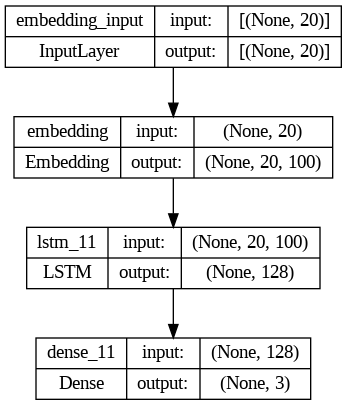

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
y = df['label']

In [ ]:
y.shape

(11959,)

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Apply SMOTE to the training data
smote = SMOTE()
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_oversampled, y_train_oversampled, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (13599, 20) (13599,)
Validation Set -> (4533, 20) (4533,)
Test Set -> (2392, 20) (2392,)


<Axes: >

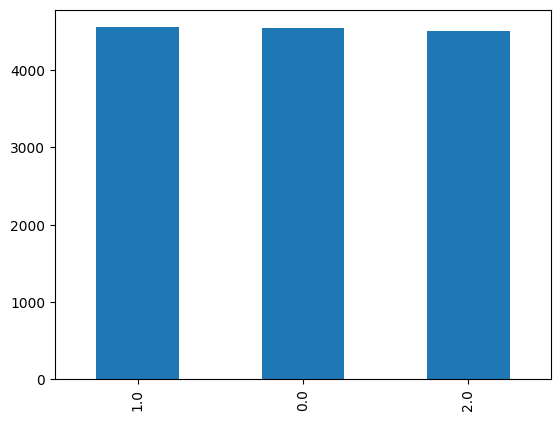

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

CountStatus = pd.value_counts(y_train.values)
CountStatus.plot.bar()

<Axes: >

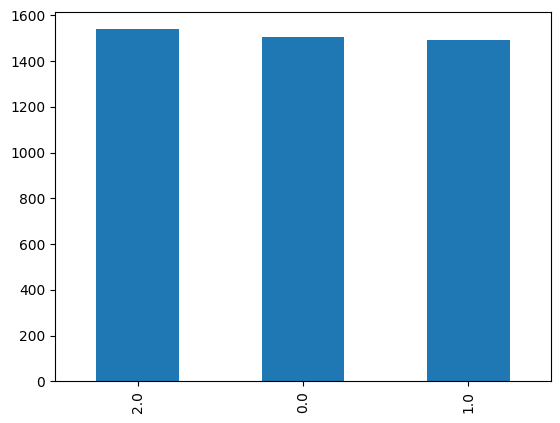

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

CountStatus = pd.value_counts(y_val.values)
CountStatus.plot.bar()

<Axes: >

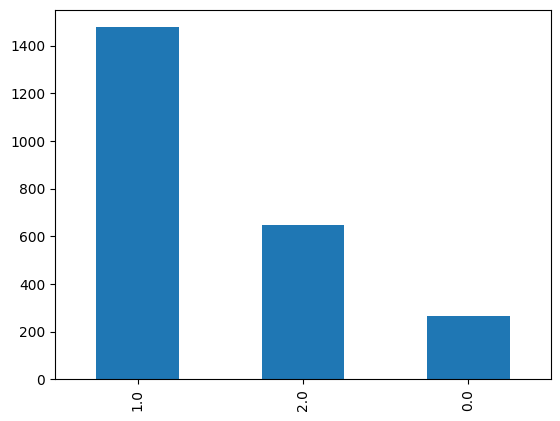

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

CountStatus = pd.value_counts(y_test.values)
CountStatus.plot.bar()

In [ ]:
y_train = pd.get_dummies(y_train)

In [ ]:
y_val = pd.get_dummies(y_val)

In [ ]:
y_test = pd.get_dummies(y_test)

In [ ]:
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (13599, 20) (13599, 3)
Validation Set -> (4533, 20) (4533, 3)
Test Set -> (2392, 20) (2392, 3)


# Train model

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=2, batch_size=4)

Epoch 1/2
3400/3400 [==============================] - 70s 19ms/step - loss: 0.9798 - accuracy: 0.5011 - precision_1: 0.6312 - recall_1: 0.2695 - val_loss: 0.9378 - val_accuracy: 0.5407 - val_precision_1: 0.6380 - val_recall_1: 0.3620
Epoch 2/2
3400/3400 [==============================] - 64s 19ms/step - loss: 0.8714 - accuracy: 0.5825 - precision_1: 0.6813 - recall_1: 0.4025 - val_loss: 0.9470 - val_accuracy: 0.5517 - val_precision_1: 0.5980 - val_recall_1: 0.4564


# Evaluation

In [ ]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.6526
Precision : 0.7119
Recall    : 0.5610
F1 Score  : 0.6275


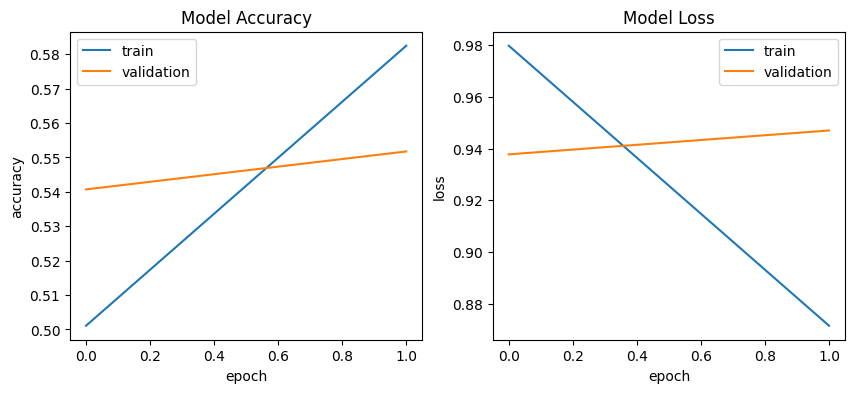

In [ ]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

75/75 [==============================] - 1s 12ms/step


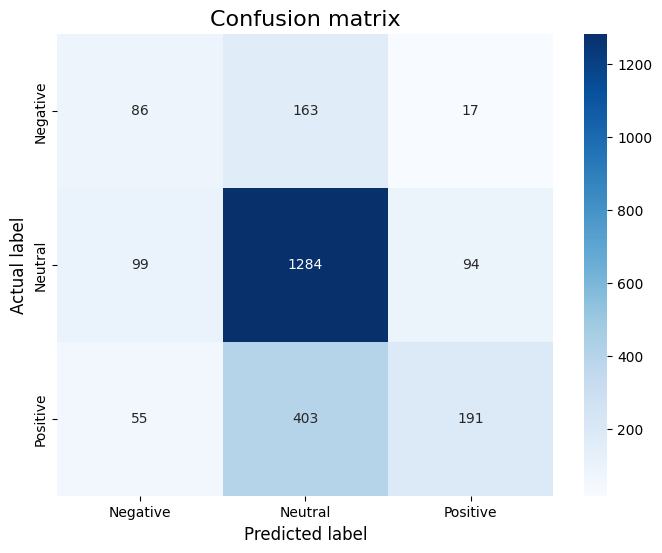

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Predicted label', fontsize=12)
    plt.ylabel('Actual label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)

In [ ]:
# Evaluate the model
scores = model.evaluate(X_train, y_train, verbose=0)
scores

[-58.222469329833984, 0.6288987398147583]

In [ ]:
from pythainlp.tokenize import word_tokenize

In [ ]:
word_tokenize('รักนะคะ')

['รัก', 'นะคะ']

In [ ]:
def preprocess(review):
    review = word_tokenize(review)
    review=pad_sequences(tokenizer.texts_to_sequences([review]), maxlen=20)
    return review

In [ ]:
def prediction(review):
    review=preprocess(review)
    score=model.predict(review)
    score=score[0]
    if score<0.4:
        print("Negative")
    elif score>0.4 and score<0.6:
        print("Neutral")
    else:
        print("Positive")
    print(score)

In [ ]:
prediction("I hate you")

1/1 [==============================] - 0s 24ms/step
Positive
[1.]


## Load Thai2vec

In [ ]:
from pythainlp import word_vector
model = word_vector.WordVector(model_name="thai2fit_wv").get_model() # load thai2fit_wv from pythainlp

In [ ]:
print(model)

KeyedVectors<vector_size=300, 51358 keys>


In [ ]:
#create dataframe
thai2dict = {}
for word in model.index_to_key:
    thai2dict[word] = model[word]
thai2vec = pd.DataFrame.from_dict(thai2dict,orient='index')
thai2vec.head(10)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
ที่,0.308956,-0.097699,0.116745,0.215612,0.015768,-0.064163,0.062168,0.039649,0.864940,0.846904,...,-0.142418,0.033241,0.171581,-0.624864,-0.009358,0.449131,0.120130,-0.122195,-0.450617,-0.071318
และ,0.010751,-0.618971,0.129665,0.035460,-0.007560,0.027607,0.397824,0.026543,0.254075,0.168328,...,-0.105786,0.180930,-0.101630,0.070885,-0.037263,0.183606,-0.049088,-0.672288,-1.293044,0.592576
เป็น,-0.015736,-0.258926,0.052953,0.153728,-0.005985,-0.021081,0.041088,0.057312,1.633230,0.442729,...,-0.009408,-0.252576,-0.305512,0.372542,0.049151,0.568470,0.266586,0.400800,-0.784650,0.197369
ของ,-0.189711,-0.174774,0.171124,-0.186771,0.054294,-0.114150,-1.109456,-0.094466,-0.447015,0.042377,...,-0.168676,-0.148738,0.680404,0.097702,0.020270,0.182967,-0.083949,0.006287,-0.707434,-0.070234
มี,-0.156962,-0.231863,0.080312,0.323157,0.215695,0.055145,0.420794,0.016842,0.256759,0.832864,...,-0.044267,-0.147186,-0.105424,0.907078,0.009299,0.550953,0.139337,0.031696,-0.670379,-0.008048
ได้,-0.428813,-0.031194,0.041922,-0.036608,-0.008106,0.076470,-0.782270,0.033361,0.606864,0.440520,...,0.024458,-0.025031,0.103389,-0.078255,0.034323,0.459774,-0.748643,0.337775,-0.487408,-0.511535
"""""""""",-0.287710,0.064193,0.205076,0.146356,-0.071343,-0.039451,-1.845461,0.163763,1.018096,0.272786,...,0.051024,-0.532856,-0.131856,-0.090323,-0.058895,0.151262,-0.420358,0.055971,-0.930814,0.163908
การ,0.239587,-0.303620,0.079953,-0.453045,-0.528826,-0.161692,0.235725,-0.099673,0.691668,0.536159,...,-0.110436,-0.297495,-0.217414,0.045158,0.066647,0.190095,-0.304333,-0.724927,-0.995488,-0.716609
(,-0.120522,-0.355783,0.168180,-0.377733,-0.158624,-0.047249,0.361140,0.161460,0.913314,0.345037,...,0.116285,-0.318218,-0.356664,0.519889,0.130475,0.125772,0.101328,-0.382658,-1.205359,0.340139
),-0.086848,-0.155231,0.133015,-0.039913,0.183761,0.115142,-1.940854,-0.066565,-2.399744,0.146722,...,0.019406,-0.181474,0.099863,0.516092,0.201697,0.249139,0.252957,1.138815,-0.018209,0.232265


# Overview Data

In [ ]:
# check class distribution
df['label'].value_counts(normalize = True)

1.0    0.628899
2.0    0.265407
0.0    0.105694
Name: label, dtype: float64

In [ ]:
df['label'].value_counts()

1.0    7521
2.0    3174
0.0    1264
Name: label, dtype: int64

<Axes: >

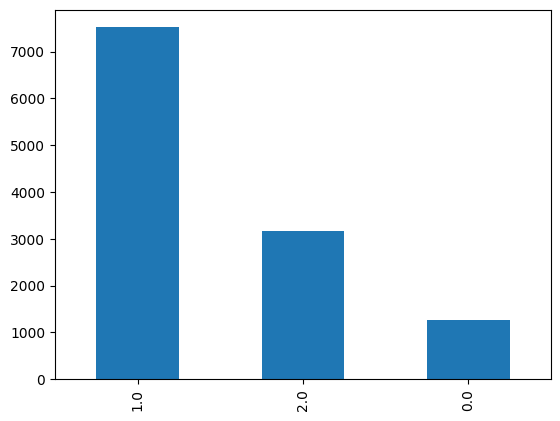

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

CountStatus = pd.value_counts(df['label'].values)
CountStatus.plot.bar()

In [ ]:
## Try retokenize
df2 = df.loc[:,'text'].map(word_tokenize)

In [ ]:
df2

0                                          [1]
1                                     [สวัสดี]
2                   [อรุณสวัสดิ์,  , ดู, ข่าว]
3                                  [D,  , jai]
4                             [สวัสดี, ชาวโลก]
                         ...                  
11954      [จุดแข็ง, หัว,  , จุดอ่อน, ที่อยู่]
11955                                       []
11956    [เจอ, ไฟไหม้,  , โทร, แจ้ง,  , เบอร์]
11957                           [แม่, ง, เก่ง]
11958                                    [งัว]
Name: text, Length: 11959, dtype: object

# Deal with imbalanced data

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

In [ ]:
df['label'].value_counts()

1    1339
2     548
0     328
Name: label, dtype: int64

In [ ]:
sm = BorderlineSMOTE(random_state=42)

In [ ]:
'''from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import pandas as pd

# Load the DataFrame
df = pd.read_csv('sentiment_data.csv')

# Split the DataFrame into training and testing datasets
train_df = df[df['split'] == 'train']
test_df = df[df['split'] == 'test']

# Separate the feature and target variables in the training dataset
X_train = train_df['text']
y_train = train_df['sentiment']

# Apply SMOTE oversampling to the feature and target variables in the training dataset
smote = SMOTE()
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train.to_numpy().reshape(-1, 1), y_train)

# Combine the oversampled feature and target variables into a new DataFrame
train_oversampled_df = pd.DataFrame({'text': X_train_oversampled.ravel(), 'sentiment': y_train_oversampled})

# Convert the text data to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_train_oversampled_vectors = vectorizer.fit_transform(train_oversampled_df['text'])

# Train a sentiment analysis model on the oversampled training dataset
clf = MultinomialNB()
clf.fit(X_train_oversampled_vectors, train_oversampled_df['sentiment'])

# Convert the text data in the testing dataset to numerical features using CountVectorizer
X_test_vectors = vectorizer.transform(test_df['text'])

# Evaluate the performance of the model on the testing dataset
y_pred = clf.predict(X_test_vectors)
print(classification_report(test_df['sentiment'], y_pred))'''

BERT (Bidirectional Encoder Representations from Transformers) is a powerful deep learning model for natural language processing tasks such as sentiment analysis. However, BERT is a complex model and may require significant computing resources and expertise to train and fine-tune.

When it comes to using SMOTE with BERT for sentiment analysis, the approach will be similar to using SMOTE with any other machine learning model. The main difference will be in how you preprocess the text data to prepare it for input into the BERT model. Here's an example of how you could use SMOTE with BERT for sentiment analysis:

- Load the dataset: Start by loading your sentiment analysis dataset into a pandas DataFrame. You can use a dataset such as the IMDB movie reviews dataset or the Yelp reviews dataset.

- Preprocess the text data: Before inputting the text data into the BERT model, you'll need to preprocess it by tokenizing the text and converting it to numerical features. You can use a pre-trained BERT tokenizer for this task.

- Split the dataset: Split the dataset into training and testing sets.

- Apply SMOTE oversampling to the training data: Use SMOTE to oversample the minority class in the training data.

- Train the BERT model: Train the BERT model on the oversampled training data and evaluate its performance on the testing data.

Here's a code example that demonstrates how to use SMOTE with BERT for sentiment analysis:

In [ ]:
"""
import pandas as pd
import tensorflow as tf
from transformers import BertTokenizer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# Load the dataset
df = pd.read_csv('sentiment_data.csv')

# Preprocess the text data
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

def tokenize_text(text):
    input_ids = []
    attention_masks = []
    for sentence in text:
        encoded_dict = tokenizer.encode_plus(
                            sentence,                      
                            add_special_tokens = True, 
                            max_length = 64,           
                            pad_to_max_length = True,
                            return_attention_mask = True,   
                            return_tensors = 'pt'     
                       )
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)

    return input_ids, attention_masks

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

# Apply SMOTE oversampling to the training data
smote = SMOTE()
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train.to_numpy().reshape(-1, 1), y_train)

# Convert the text data to numerical features using BERT tokenizer
X_train_ids, X_train_masks = tokenize_text(X_train_oversampled)
X_test_ids, X_test_masks = tokenize_text(X_test)

# Train the BERT model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(64,), dtype=tf.int32),
    tf.keras.layers.Input(shape=(64,), dtype=tf.int32),
    tf.keras.layers.Lambda(lambda x: {"input_ids": x[0], "attention_mask": x[1]}),
    tf.keras.layers.Lambda(lambda...

"""

# Check dist data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
# read data from csv file
df = pd.read_csv('/content/drive/MyDrive/data_all.csv', delimiter=',')

In [4]:
df.label = df['label'].astype('int')

<Axes: >

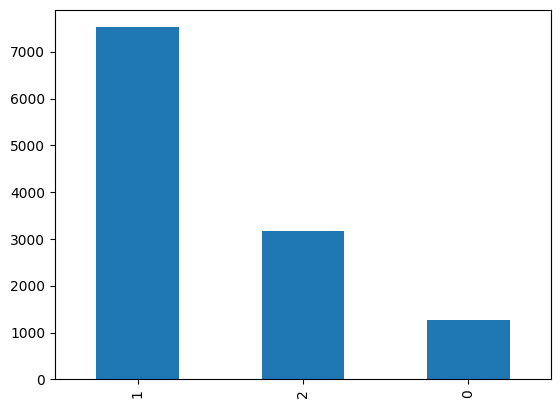

In [ ]:
CountStatus = pd.value_counts(df['label'].values)
CountStatus.plot.bar()

In [11]:
df.iloc[11945:11955, :]

,label,text
11945,1,ภาษีสื
11946,0,ขำหาสิแตกหยัง
11947,1,เลิกส่งออก
11948,0,สู้คดีเกรงใจ สนุก
11949,1,ยกเลิก กัญชาเสรี ตัดปัญหา สี่เกียวข้องยาเสพติด
11950,2,งบเสวยสุข สนประชาชน 555
11951,1,ร่องทิ้งน้ำเสียทำดีดี เบี่ยงน้ำทิ้งท่อระบายน้ำสิ
11952,2,ค...
11953,1,นอนสะพานลุงตู่
11954,1,จุดแข็งหัว จุดอ่อนที่อยู่
